# Working on Rental Housing Price data
About Dataset
This dataset provides comprehensive information about rental house prices across various locations in India. It includes details such as house type, size, location, city, latitude, longitude, price, currency, number of bathrooms, number of balconies, negotiability of price, price per square foot, verification date, description of the property, security deposit, and status of furnishing (furnished, unfurnished, semi-furnished).

Note This is Recently scraped data of April 2024.

Dataset Glossary (Column-Wise)

Column                                                                                       	Meaning

House Type	                                                               |   Type of house (e.g., apartment, villa, duplex).
                                                                        
House Size	                                                                 Size of the house in square feet or square meters.

Location	                                                                  Specific area or neighborhood where the property is located.

City	City in India where the property is situated.

Latitude	Geographic latitude coordinates of the property location.

Longitude	Geographic longitude coordinates of the property location.

Price	Rental price of the house.

Currency	Currency in which the price is denoted (e.g., INR - Indian Rupees).

Number of Bathrooms	Total number of bathrooms in the house.

Number of Balconies	Total number of balconies in the house.

Negotiability	Indicates whether the price is negotiable (Yes/No).

Price per Square Foot	Price of the house per square foot.

Verification Date	Date when the rental information was verified.

Description	Additional description or details about the property.

Security Deposit	Amount of security deposit required for renting the property.

Status	Indicates the furnishing status of the property (furnished, unfurnished, semi-furnished).

Source: https://www.kaggle.com/datasets/bhavyadhingra00020/india-rental-house-price


![Online Image](https://southdelhifinesthomes.com/wp-content/uploads/2022/09/build-a-house-g4358e1fbe_1920.jpg)

In [85]:
#built in imports
import os
import sys

#module imports
import pandas as pd
import plotly.express as px

# Setup project environment

df=pd.read_csv(r'C:\Users\dhamech\Documents\DATA ANALYTICS\data\raw\Indian_housing_Delhi_data.csv')


In [86]:
df.head()

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
0,1 RK Studio Apartment,400 sq ft,Kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,NaN,NaN,NaN,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",No Deposit,Furnished
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,Delhi,28.643259,77.132828,20000,INR,1.0,NaN,NaN,NaN,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,No Deposit,Furnished
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,Delhi,28.618677,77.053352,8500,INR,1.0,NaN,NaN,NaN,Posted 12 days ago,"Zero Brokerage.\n\n2 Room set, Govt bijali Met...",No Deposit,Semi-Furnished
3,3 BHK Independent House,"1,020 sq ft",Model Town,Delhi,28.712898,77.180000,48000,INR,3.0,NaN,NaN,NaN,Posted a year ago,Itâs a 3 bhk independent house situated in M...,No Deposit,Furnished
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,Delhi,28.723539,77.131424,20000,INR,2.0,NaN,NaN,NaN,Posted a year ago,Well designed 2 bhk multistorey apartment is a...,No Deposit,Unfurnished


## KEEPING ONLY THE USEFUL COLUMNS

In [87]:
### FIRST WE NEED TO CONVERT HOUSE SIZE IN INTEGERS

# Step 1: Remove all non-digit characters and commas, extract numeric part
df['house_size_cleaned'] = (
    df['house_size']
    .astype(str)  # Ensure it's string
    .str.replace(',', '', regex=False)  # Remove commas
    .str.extract(r'(\d+)')  # Extract numbers only
    .astype(float)  # Convert to numeric
    .astype('Int64')  # Keeps NaN as null, unlike int
)


In [36]:
df['monthly_rent']=df['price']
del df['price']

In [37]:
processed_df=df[['city','location','house_type','house_size_cleaned','numBathrooms','numBalconies','Status','monthly_rent']]
processed_df.head()

,city,location,house_type,house_size_cleaned,numBathrooms,numBalconies,Status,monthly_rent
0,Delhi,Kalkaji,1 RK Studio Apartment,400,1.0,NaN,Furnished,22000
1,Delhi,Mansarover Garden,1 RK Studio Apartment,400,1.0,NaN,Furnished,20000
2,Delhi,Uttam Nagar,2 BHK Independent Floor,500,1.0,NaN,Semi-Furnished,8500
3,Delhi,Model Town,3 BHK Independent House,1020,3.0,NaN,Furnished,48000
4,Delhi,Sector 13 Rohini,2 BHK Apartment,810,2.0,NaN,Unfurnished,20000


### AGAIN ASSIGNING THE 'HOUSE_SIZE_CLEANED' VALUES TO HOUSE_SIZE'

In [40]:
processed_df['house_size']=processed_df['house_size_cleaned']
del processed_df['house_size_cleaned']

C:\Users\dhamech\AppData\Local\Temp\ipykernel_40236\668115162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df['house_size']=processed_df['house_size_cleaned']


In [42]:
processed_df.head()

,city,location,house_type,numBathrooms,numBalconies,Status,monthly_rent,house_size
0,Delhi,Kalkaji,1 RK Studio Apartment,1.0,NaN,Furnished,22000,400
1,Delhi,Mansarover Garden,1 RK Studio Apartment,1.0,NaN,Furnished,20000,400
2,Delhi,Uttam Nagar,2 BHK Independent Floor,1.0,NaN,Semi-Furnished,8500,500
3,Delhi,Model Town,3 BHK Independent House,3.0,NaN,Furnished,48000,1020
4,Delhi,Sector 13 Rohini,2 BHK Apartment,2.0,NaN,Unfurnished,20000,810


In [41]:
df[df['numBathrooms'].isnull()][['house_type','house_size','location','numBalconies','numBathrooms','monthly_rent']]

,house_type,house_size,location,numBalconies,numBathrooms,monthly_rent
1111,2 BHK Apartment,"1,200 sq ft",Sector 12 Dwarka,NaN,NaN,24000
2263,2 BHK Apartment,990 sq ft,Sheikh Sarai,NaN,NaN,14000
2952,1 RK Studio Apartment,500 sq ft,Greater kailash 1,1.0,NaN,22000
3359,1 RK Studio Apartment,500 sq ft,Alaknanda,NaN,NaN,20000
3422,1 RK Studio Apartment,300 sq ft,East of Kailash,1.0,NaN,10000
3429,1 RK Studio Apartment,400 sq ft,East of Kailash,1.0,NaN,15000
3432,1 RK Studio Apartment,300 sq ft,Greater kailash 1,1.0,NaN,13000
3610,3 BHK Independent Floor,950 sq ft,Shalimar Bagh,NaN,NaN,26000
3611,2 BHK Independent Floor,700 sq ft,Shalimar Bagh,NaN,NaN,22000
3612,1 BHK Independent Floor,650 sq ft,Paschim Vihar,NaN,NaN,12000


### CHECKING THE UNIQUE VALUES IN 'HOUSE_TYPE'

In [39]:
print(*processed_df['house_type'].unique(),sep='\n')

1 RK Studio Apartment 
2 BHK Independent Floor 
3 BHK Independent House 
2 BHK Apartment 
3 BHK Apartment 
3 BHK Independent Floor 
4 BHK Independent Floor 
1 BHK Independent Floor 
1 BHK Apartment 
8 BHK Independent Floor 
4 BHK Apartment 
6 BHK Independent Floor 
2 BHK Independent House 
1 BHK Independent House 
5 BHK Independent Floor 
4 BHK Independent House 
5 BHK Villa 
5 BHK Independent House 
7 BHK Independent Floor 
8 BHK Independent House 
10 BHK Independent House 
7 BHK Independent House 
9 BHK Independent House 
8 BHK Villa 
4 BHK Villa 
5 BHK Apartment 
6 BHK penthouse 
12 BHK Independent House 


# DATA TRANSFORMATION
## SPLITTING THE HOUSE TYPE INTO CATEGORIES FOR BETTER INSIGHT

In [88]:
from collections import OrderedDict

house_type_map=OrderedDict({
    'studio apartment':'studio',
    'villa':'villa',
    'independent house':'villa',
    'independent floor':'apartment',
    'penthouse':'apartment',
    'apartment':'apartment'
})

intermediate_record=[]
for record in processed_df['house_type']:
    for house_type,category in house_type_map.items():
        if house_type in record.lower():
            intermediate_record.append(category)
            break
    
    

In [89]:
len(intermediate_record)

5000

In [90]:
processed_df['category']=intermediate_record

C:\Users\dhamech\AppData\Local\Temp\ipykernel_40236\711002635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df['category']=intermediate_record


In [91]:
processed_df.head()

,city,location,house_type,numBathrooms,numBalconies,Status,monthly_rent,house_size,price,numBedrooms,price_per_room,price_per_sqft,category
0,Delhi,Kalkaji,1 RK Studio Apartment,1.0,NaN,Furnished,22000,400,8800000.0,1,8800000.0,22000.0,studio
1,Delhi,Mansarover Garden,1 RK Studio Apartment,1.0,NaN,Furnished,20000,400,8000000.0,1,8000000.0,20000.0,studio
2,Delhi,Uttam Nagar,2 BHK Independent Floor,1.0,NaN,Semi-Furnished,8500,500,3400000.0,2,1700000.0,6800.0,apartment
3,Delhi,Model Town,3 BHK Independent House,3.0,NaN,Furnished,48000,1020,19200000.0,3,6400000.0,18823.529412,villa
4,Delhi,Sector 13 Rohini,2 BHK Apartment,2.0,NaN,Unfurnished,20000,810,8000000.0,2,4000000.0,9876.54321,apartment


### WE WILL NOW ALLOT THE NUMBER OF BEDROOMS WITH RESPECT TO THE APARTMENTS OR VILLA

In [92]:
processed_df["numBedrooms"] = [int(record.split(" ", 1)[0]) for record in processed_df["house_type"]]

C:\Users\dhamech\AppData\Local\Temp\ipykernel_40236\2318267807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df["numBedrooms"] = [int(record.split(" ", 1)[0]) for record in processed_df["house_type"]]


In [47]:
processed_df[processed_df['numBedrooms']==3]

,city,location,house_type,numBathrooms,numBalconies,Status,monthly_rent,house_size,price,numBedrooms
3,Delhi,Model Town,3 BHK Independent House,3.0,NaN,Furnished,48000,1020,19200000.0,3
5,Delhi,DLF Farms,3 BHK Apartment,1.0,NaN,Semi-Furnished,11000,750,4400000.0,3
6,Delhi,laxmi nagar,3 BHK Independent Floor,2.0,NaN,Furnished,20000,1300,8000000.0,3
7,Delhi,Swasthya Vihar,3 BHK Independent Floor,2.0,NaN,Furnished,35000,1200,14000000.0,3
8,Delhi,Janakpuri,3 BHK Independent House,2.0,NaN,Semi-Furnished,39000,1100,15600000.0,3
...,...,...,...,...,...,...,...,...,...,...
4981,Delhi,Jor bagh,3 BHK Independent Floor,3.0,2.0,Unfurnished,341165,2856,136466000.0,3
4982,Delhi,Jor bagh,3 BHK Independent Floor,3.0,2.0,Unfurnished,301020,2856,120408000.0,3
4997,Delhi,New Friends Colony,3 BHK Independent Floor,3.0,2.0,Unfurnished,301012,1855,120404800.0,3
4998,Delhi,New Friends Colony,3 BHK Independent Floor,3.0,2.0,Unfurnished,301011,2856,120404400.0,3


# STAGE 3 -- ESTIMATING THE PRICE OF THE HOUSES FROM THE MONTHLY RENT
### ANNUAL RENT IS GENERALLY 3% OF THE PRICE OF THE HOUSE IN METRO CITIES

FOR TIER 1 CITIES LIKE DELHI THE METHOD WILL BE
METHOD=(MONTHLY_RENT * 12)/0.03


In [48]:
processed_df.eval('price=(monthly_rent * 12)/0.03',inplace=True)
processed_df.head()

,city,location,house_type,numBathrooms,numBalconies,Status,monthly_rent,house_size,price,numBedrooms
0,Delhi,Kalkaji,1 RK Studio Apartment,1.0,NaN,Furnished,22000,400,8800000.0,1
1,Delhi,Mansarover Garden,1 RK Studio Apartment,1.0,NaN,Furnished,20000,400,8000000.0,1
2,Delhi,Uttam Nagar,2 BHK Independent Floor,1.0,NaN,Semi-Furnished,8500,500,3400000.0,2
3,Delhi,Model Town,3 BHK Independent House,3.0,NaN,Furnished,48000,1020,19200000.0,3
4,Delhi,Sector 13 Rohini,2 BHK Apartment,2.0,NaN,Unfurnished,20000,810,8000000.0,2


In [49]:
processed_df.eval('price_per_room=price/numBedrooms',inplace=True)
processed_df.head()

C:\Users\dhamech\AppData\Local\Temp\ipykernel_40236\1648104608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df.eval('price_per_room=price/numBedrooms',inplace=True)


,city,location,house_type,numBathrooms,numBalconies,Status,monthly_rent,house_size,price,numBedrooms,price_per_room
0,Delhi,Kalkaji,1 RK Studio Apartment,1.0,NaN,Furnished,22000,400,8800000.0,1,8800000.0
1,Delhi,Mansarover Garden,1 RK Studio Apartment,1.0,NaN,Furnished,20000,400,8000000.0,1,8000000.0
2,Delhi,Uttam Nagar,2 BHK Independent Floor,1.0,NaN,Semi-Furnished,8500,500,3400000.0,2,1700000.0
3,Delhi,Model Town,3 BHK Independent House,3.0,NaN,Furnished,48000,1020,19200000.0,3,6400000.0
4,Delhi,Sector 13 Rohini,2 BHK Apartment,2.0,NaN,Unfurnished,20000,810,8000000.0,2,4000000.0


## Price per sq ft

In [50]:
processed_df.eval('price_per_sqft=price/house_size',inplace=True)
processed_df.head()

C:\Users\dhamech\AppData\Local\Temp\ipykernel_40236\3832378045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df.eval('price_per_sqft=price/house_size',inplace=True)


,city,location,house_type,numBathrooms,numBalconies,Status,monthly_rent,house_size,price,numBedrooms,price_per_room,price_per_sqft
0,Delhi,Kalkaji,1 RK Studio Apartment,1.0,NaN,Furnished,22000,400,8800000.0,1,8800000.0,22000.0
1,Delhi,Mansarover Garden,1 RK Studio Apartment,1.0,NaN,Furnished,20000,400,8000000.0,1,8000000.0,20000.0
2,Delhi,Uttam Nagar,2 BHK Independent Floor,1.0,NaN,Semi-Furnished,8500,500,3400000.0,2,1700000.0,6800.0
3,Delhi,Model Town,3 BHK Independent House,3.0,NaN,Furnished,48000,1020,19200000.0,3,6400000.0,18823.529412
4,Delhi,Sector 13 Rohini,2 BHK Apartment,2.0,NaN,Unfurnished,20000,810,8000000.0,2,4000000.0,9876.54321


In [51]:
processed_df.describe()

,numBathrooms,numBalconies,monthly_rent,house_size,price,numBedrooms,price_per_room,price_per_sqft
count,4975.000000,2737.000000,5.000000e+03,5000.0,5.000000e+03,5000.000000,5.000000e+03,5000.0
mean,2.918593,1.954330,2.221738e+05,2982.8854,8.886953e+07,3.103600,2.379744e+07,23734.231737
std,1.087823,0.547219,2.739843e+05,2168.663368,1.095937e+08,1.155653,2.442825e+07,17643.956096
min,1.000000,1.000000,3.000000e+03,150.0,1.200000e+06,1.000000,5.333333e+05,1600.0
25%,2.000000,2.000000,2.950000e+04,1100.0,1.180000e+07,2.000000,5.333333e+06,10666.666667
50%,3.000000,2.000000,1.250000e+05,2500.0,5.000000e+07,3.000000,1.658333e+07,19261.62214
75%,4.000000,2.000000,3.011020e+05,5896.0,1.204408e+08,4.000000,4.010110e+07,32258.064516
max,10.000000,8.000000,3.010101e+06,14521.0,1.204040e+09,12.000000,2.236212e+08,152809.937126


In [52]:
processed_df.head()

,city,location,house_type,numBathrooms,numBalconies,Status,monthly_rent,house_size,price,numBedrooms,price_per_room,price_per_sqft
0,Delhi,Kalkaji,1 RK Studio Apartment,1.0,NaN,Furnished,22000,400,8800000.0,1,8800000.0,22000.0
1,Delhi,Mansarover Garden,1 RK Studio Apartment,1.0,NaN,Furnished,20000,400,8000000.0,1,8000000.0,20000.0
2,Delhi,Uttam Nagar,2 BHK Independent Floor,1.0,NaN,Semi-Furnished,8500,500,3400000.0,2,1700000.0,6800.0
3,Delhi,Model Town,3 BHK Independent House,3.0,NaN,Furnished,48000,1020,19200000.0,3,6400000.0,18823.529412
4,Delhi,Sector 13 Rohini,2 BHK Apartment,2.0,NaN,Unfurnished,20000,810,8000000.0,2,4000000.0,9876.54321


# VISUALISATION

In [53]:
def get_box_plot(input_df, plot_parameter="price", **filter_kwargs):
    for key, value in filter_kwargs.items():
        if key in input_df.columns:
            input_df = input_df[input_df[key] == value]
    fig = px.box(input_df, y=plot_parameter)
    return fig

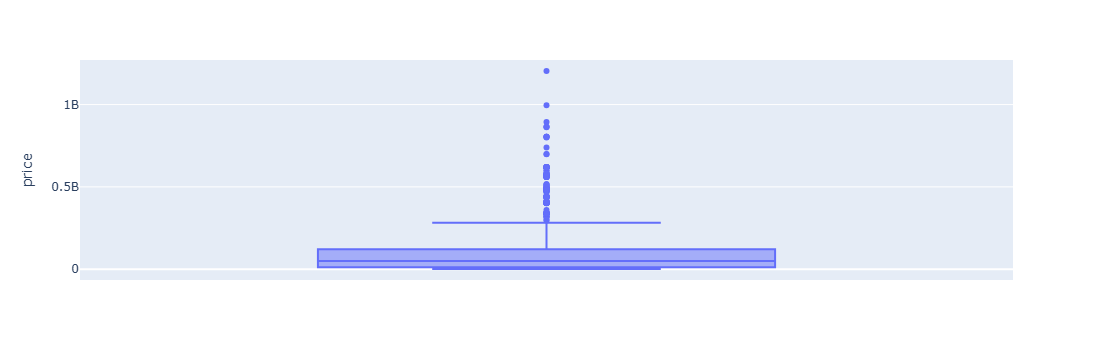

In [60]:
get_box_plot(processed_df,plot_parameter='price').show()

### 📊 FINDINGS (prices of house in Delhi)

| Metric                                      | Value             |
|--------------------------------------------|-------------------|
| The median price of a house in Delhi       | 12 million        |
| The minimum price of a house               | 1.1 million       |
| The lower and upper quartile price range   | ~12M to ~120M     |
| The maximum price of a house in Delhi      | 1.2 billion       |

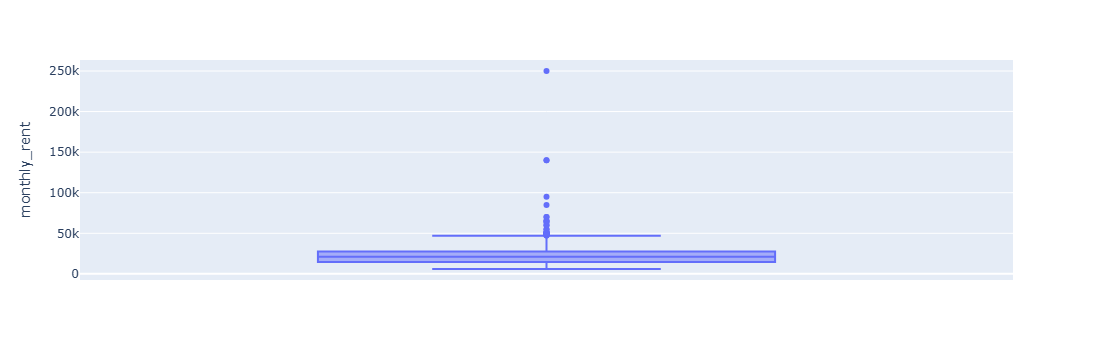

In [61]:
get_box_plot(processed_df,plot_parameter='monthly_rent',numBedrooms=2,Status='Semi-Furnished').show()

### 📊 FINDINGS( MONTHLY RENT OF 2BHK SEMI-FURNISHED HOUSES)

| Metric                                      | Value             |
|--------------------------------------------|-------------------|
| The median MONTHLY RENT                    |     21K           |
| The minimum MONTHLY RENT                   |     6K            |
| The lower and upper quartile               | 14.5-27.5K        |
| The maximum RENT                           |    250K           |

In [62]:
processed_df['price'].max()

np.float64(1204040400.0)

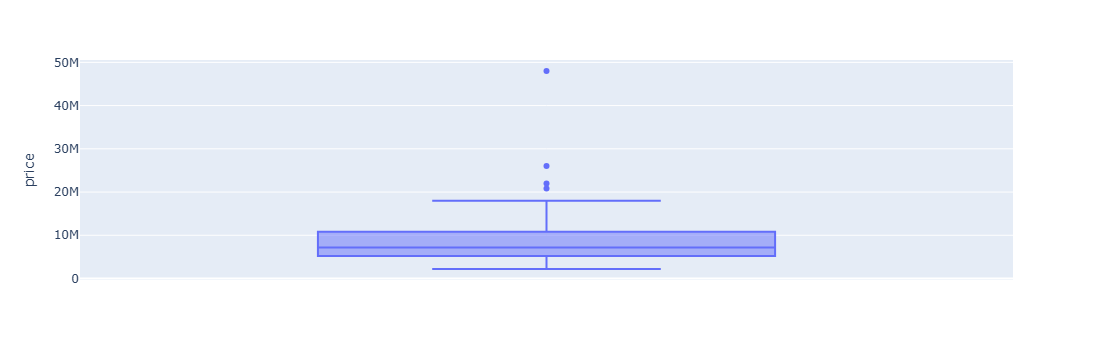

In [63]:
get_box_plot(processed_df,plot_parameter='price',numBedrooms=2,Status='Unfurnished').show()

### 📊 FINDINGS ( PRICE OF 2 BKH UNFURNISHED HOUSES)

| Metric                                      | Value             |
|--------------------------------------------|-------------------|
| The median                                 | 7.2 million       |
| The minimum                                | 2.2 million       |
| The lower and upper quartile price range   | 5.2-10.8 million  |
| The maximum                                | 48 million        |

In [64]:
processed_df['price'].min()

np.float64(1200000.0)

# USE_CASE
## LOOKING FOR RENTALS IN A SPECIFIC LOCATION/OR WITH SPECIFIC FURNISHING STATUS OR WITH A SPECIFIC NUMBER OF BEDROOMS/BATHROOMS

In [65]:
processed_df[processed_df['numBedrooms']==2].groupby('location')['monthly_rent'].describe()

,count,mean,std,min,25%,50%,75%,max
location,,,,,,,,
Abul Fazal Enclave Jamia Nagar,1.0,13000.000000,NaN,13000.0,13000.0,13000.0,13000.0,13000.0
Ajmeri Gate,2.0,21000.000000,4242.640687,18000.0,19500.0,21000.0,22500.0,24000.0
Anand Vihar,2.0,19500.000000,707.106781,19000.0,19250.0,19500.0,19750.0,20000.0
Ashok Nagar,2.0,23500.000000,4949.747468,20000.0,21750.0,23500.0,25250.0,27000.0
Aya Nagar,1.0,12000.000000,NaN,12000.0,12000.0,12000.0,12000.0,12000.0
...,...,...,...,...,...,...,...,...
i p extension patparganj,3.0,18666.666667,1154.700538,18000.0,18000.0,18000.0,19000.0,20000.0
laxmi nagar,4.0,12625.000000,1493.039406,11000.0,11750.0,12500.0,13375.0,14500.0
masoodpur,1.0,35000.000000,NaN,35000.0,35000.0,35000.0,35000.0,35000.0


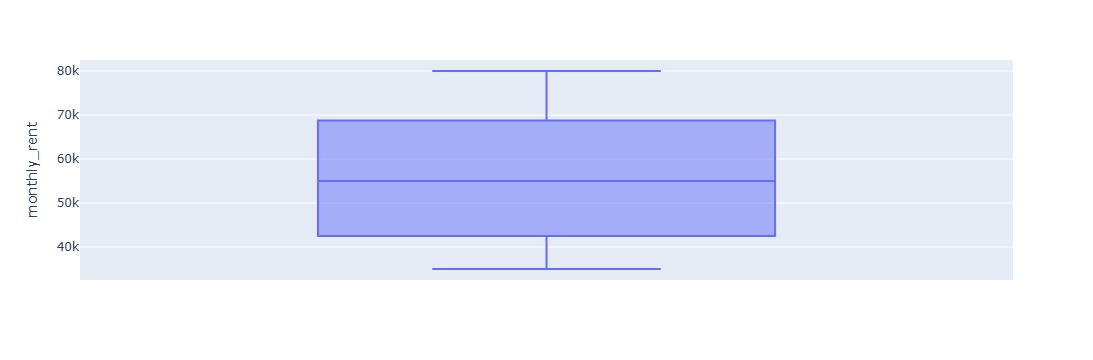

In [66]:
get_box_plot(processed_df,plot_parameter='monthly_rent',Status='Semi-Furnished',location='Mansarover Garden').show()

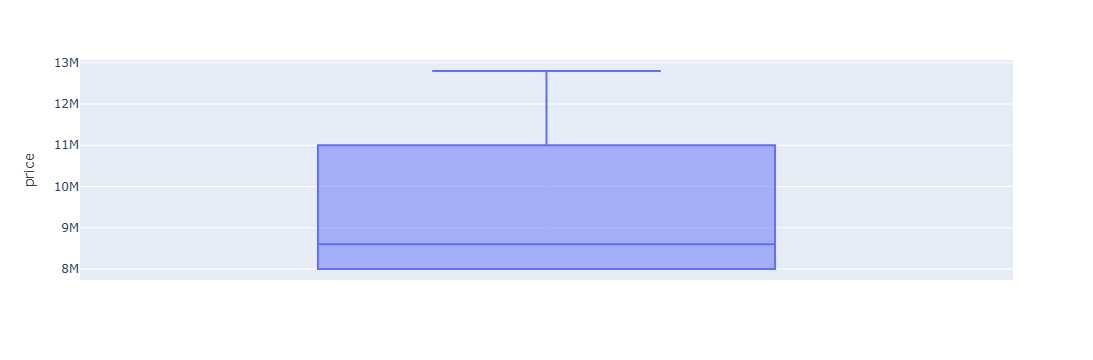

In [67]:
get_box_plot(processed_df,plot_parameter='price',location='Sector 13 Rohini').show()

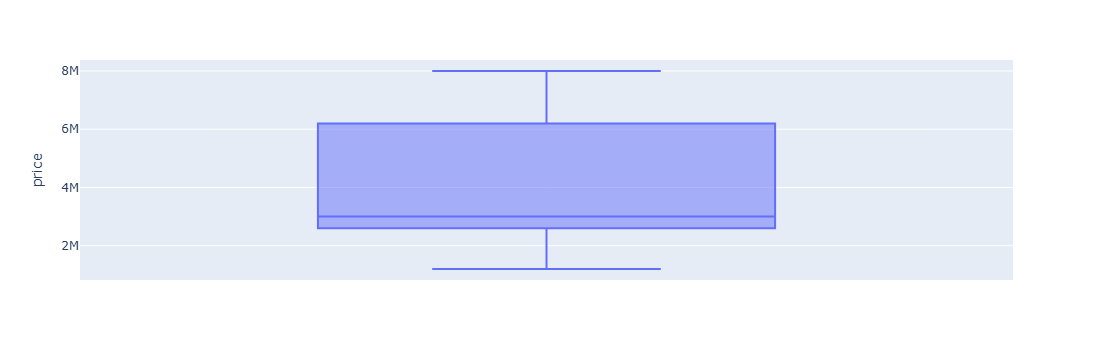

In [68]:
get_box_plot(processed_df,plot_parameter='price',category='studio',Status='Semi-Furnished').show()

# TOP COSTLIEST AREAS
* HIGHER THE BEDROOMS THE BETTER
* MONTHLY RENT ABOVE 40K
* HIGHER NUMBER OF BATHROOMS



In [69]:
processed_df[processed_df['location']=='Sector 13 Rohini'].numBedrooms.median()

np.float64(2.0)

In [70]:
processed_df[processed_df['location']=='Uttam Nagar'].numBedrooms.max()

np.int64(4)

In [71]:
processed_df.groupby('location').count().sort_values(by=['house_type'])

,city,house_type,house_size,numBathrooms,numBalconies,Status,monthly_rent,category,numBedrooms,price,price_per_room
location,,,,,,,,,,,
Block E Lajpat Nagar I,1,1,1,1,1,1,1,1,1,1,1
Block MP Poorvi Pitampura,1,1,1,1,1,1,1,1,1,1,1
Block PP Poorvi Pitampura,1,1,1,1,1,1,1,1,1,1,1
Block WP Poorvi Pitampura,1,1,1,1,1,1,1,1,1,1,1
Central Ridge Reserve Forest,1,1,1,1,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
Jor bagh,125,125,125,125,113,125,125,125,125,125,125
Chattarpur,145,145,145,145,58,145,145,145,145,145,145
Vasant Vihar,145,145,145,145,128,145,145,145,145,145,145


In [72]:
#median distribution of bedrooms
median=processed_df.groupby('location')['numBedrooms'].median().sort_values(ascending=False)

In [73]:
print(median)

location
DLF Farms                   8.0
Shakti Nagar                6.0
Sheikh Sarai Village        6.0
Lodhi Estate                5.0
Lodhi Gardens               5.0
                           ... 
Freedom Fighters Enclave    1.0
SectorB Vasant Kunj         1.0
Shahdara                    1.0
Shakurpur Colony            1.0
Sundar Nagar                1.0
Name: numBedrooms, Length: 288, dtype: float64


In [74]:
median=processed_df.groupby('monthly_rent')['numBedrooms'].max().sort_values(ascending=False)
print(median)

monthly_rent
3010101    12
854612     10
900000     10
1010102     9
400000      9
           ..
18800       1
19100       1
19700       1
3500        1
3000        1
Name: numBedrooms, Length: 709, dtype: int64


In [75]:
median_bedroom=processed_df.groupby('monthly_rent')['price_per_room'].median().sort_values(ascending=False)
print(median_bedroom)

monthly_rent
2236212    2.236212e+08
2162295    2.162295e+08
2011005    2.011005e+08
2010105    2.010105e+08
2000000    2.000000e+08
               ...     
3600       1.440000e+06
3500       1.400000e+06
3000       1.200000e+06
4000       1.066667e+06
4999       9.998000e+05
Name: price_per_room, Length: 709, dtype: float64


In [76]:
processed_df.groupby('location')['price'].median().sort_values(ascending=False)

location
Central Ridge Reserve Forest    800000000.0
Babar Road                      567272800.0
Malcha Marg                     560440400.0
DLF Farms                       560000000.0
Kasturba Gandhi Marg            533841200.0
                                   ...     
Nangloi                           2400000.0
Shakurpur Colony                  2000000.0
Santnagar                         1999600.0
dda flat                          1800000.0
Sector 34 Rohini                  1440000.0
Name: price, Length: 288, dtype: float64

In [77]:
processed_df.groupby('location')[['price','monthly_rent','numBedrooms']].mean().sort_values(by='monthly_rent',ascending=False)


,price,monthly_rent,numBedrooms
location,,,
Central Ridge Reserve Forest,8.000000e+08,2.000000e+06,4.000000
Kasturba Gandhi Marg,5.926126e+08,1.481532e+06,4.500000
Aurungzeb Road,5.727868e+08,1.431967e+06,4.909091
Amrita Shergill Marg,5.599622e+08,1.399905e+06,5.153846
Lodhi Road,5.501864e+08,1.375466e+06,4.500000
...,...,...,...
Burari,2.333333e+06,5.833333e+03,2.000000
Shakurpur Colony,2.000000e+06,5.000000e+03,1.000000
Santnagar,1.999600e+06,4.999000e+03,2.000000


# USE-CASE SEARCH QUERIES

# 1) A family of 3 wanting the cheapest apartment in delhi
### CONSTRAINTS
* ATLEAST 2BHK
* STATUS= FURNISHED

In [78]:
search=processed_df[
    (processed_df['Status']=='Furnished')&
    (processed_df['numBedrooms']>2)
]

In [79]:
abc=search.groupby(['location','monthly_rent'])['price'].min().sort_values().head(1)

In [80]:
print(abc)

location     monthly_rent
Uttam Nagar  4000            1600000.0
Name: price, dtype: float64


### FINDINGS 
UTTAM NAGAR SHOULD BE THE PERFECT CHOICE FOR THE FAMILY

# 2) A BUSINESSMAN WANTING THE BEST APARTMENT IN DELHI 
### CONSTRAINTS
* NO. OF BEDROOMS MORE THAN 4
* NO. OF BALCONIES MORE THAN 2

In [64]:
search=processed_df[
    (processed_df['numBedrooms']>4)&
    (processed_df['numBalconies']>2)
]

In [65]:
xyz=search.groupby(['location','monthly_rent'])['category'].max().sort_values(ascending=False).head(1)


In [66]:
print(xyz)

location              monthly_rent
Amrita Shergill Marg  1201102         villa
Name: category, dtype: object


### FINDINGS
THE BEST CHOICE FOR THE BUSINESSMAN WOULD BE A VILLA IN 'AMRITA SHERGILL MARG' CONSIDERING HIS CONSTRAINTS

# 3) A STRUGGLING ARTIST WANTS A RENTAL IN DELHI
### CONSTRAINTS
* SHOULD BE A STUDIO APARTMENT
* MONTHLY RENT LESS THAN 30K

In [67]:
search=processed_df[
    (processed_df['category']=='studio')&
    (processed_df['monthly_rent']<30000)
    
]      

In [68]:
xyz=search.groupby('location')['monthly_rent'].min().sort_values().head(1)
print(xyz)

location
Uttam Nagar    3000
Name: monthly_rent, dtype: int64


### FINDINGS
THE STUIDO APARTMENT IN UTTAM NAGAR WOULD BE THE BEST CHOICE FOR THE ARTIST



## LETS SEE IF HE WANTS A SPECIFIC FURNISHING STATUS, LETS SAY SEMI-FURNISHED

In [69]:
search=processed_df[
    (processed_df['category']=='studio')&
    (processed_df['monthly_rent']<30000)&
    (processed_df['Status']=='Semi-Furnished')
    
]      

In [70]:
xyz=search.groupby(['location','Status','price'])['monthly_rent'].min().sort_values().head(1)
print(xyz)

location     Status          price    
Uttam Nagar  Semi-Furnished  1200000.0    3000
Name: monthly_rent, dtype: int64


In [71]:
#what if he increases his budget now to lets say more than 50k per mmonth, rest all constant
search=processed_df[
    (processed_df['category']=='studio')&
    (processed_df['monthly_rent']>=50000)&
    (processed_df['Status']=='Semi-Furnished')
    
]      

In [72]:
xyz=search.groupby(['location','Status','price'])['monthly_rent'].min().sort_values().head(1)
print(xyz)

Series([], Name: monthly_rent, dtype: int64)


THERE'S NO SUCH APARTMENT IN DELHI WITH ALL THE CONSTRAINTS, LETS RELAX THE CONSTRAINTS A BIT

* STATUS IS NOT DEFINED 
* BUDGET LOWERED TO MORE THAN 30K/PM

In [73]:
search=processed_df[
    (processed_df['category']=='studio')&
    (processed_df['monthly_rent']>=30000)
    
]      

In [74]:
xyz=search.groupby(['location','category','Status','price'])['monthly_rent'].min().sort_values().head(1)
print(xyz)

location            category  Status     price     
Panchsheel Enclave  studio    Furnished  13200000.0    33000
Name: monthly_rent, dtype: int64


THE STUDIO APARTMENT IN PANCHSHEEL ENCLAVE SHOULD BE THE BEST CHOICE FOR THE ARTIST IF HIS BUDGET IS AROUND 30-35K

# 4)An HNI(HIGH NET-WORTH INDIVIDUAL) WANTS A PENTHOUSE IN DELHI
### CONSTRAINTS
* CATEGORY --> APARTMENT
* STATUS --> SEMI FURNISHED OR FURNISHED

In [ ]:
penthouse=processed_df[
    (processed_df['category']=='apartment')&
    (processed_df['Status'].isin(['Semi-Furnished', "Furnished"]))
]

In [ ]:
search=penthouse.groupby(['location','monthly_rent','Status'])['price'].max().sort_values(ascending=False).head(1)
print(search)

### THE PENTHOUSE IN 'DLF FARMS' SHOULD BE THE BEST CHOICE FOR THE BUSINESSMAN GIVEN HIS CONDITIONS

# STAGE 5-- 

## NOW WHAT IF SOMEONE WANTS A RENTAL IN SOME SPECIFIC LOCATIONS IN DELHI

In [75]:
processed_df.groupby('location')['monthly_rent'].max().sort_values(ascending=False).head(10)

location
Amrita Shergill Marg            3010101
Aurungzeb Road                  2491184
Tilak Marg                      2236212
Tuglak Road                     2162955
Kasturba Gandhi Marg            2154919
Lodhi Road                      2011005
Malcha Marg                     2010102
Golf Links                      2010101
Central Ridge Reserve Forest    2000000
Jor bagh                        1749194
Name: monthly_rent, dtype: int64

THESE ARE ALL THE HIGHEST RENTAL PREMIUM AREAS IN DELHI, WE WILL WORK ON THIS FOR NOW

## A FAMILY MIGRATING FROM MAHARASHTRA WANTS AN APARTMENT IN 'GOLF LINKS'? LETS GET THEM WHAT THEY WANT
CONSTRAINTS-
* SHOULD BE SEMI-FURNISHED OR FURNISHED
* MONTHLY RENT SHOULD BE UNDER 250K
* MINIMUM 3 BEDROOMS

In [76]:
golf_link=processed_df[
    (processed_df['Status'].isin(['Semi-Furnished','Furnished']))&
    (processed_df['location']=='Golf Links')&
    (processed_df['monthly_rent']<250000)&
    (processed_df['numBedrooms']>=3)
]

In [77]:
golf_link.groupby(['location','numBedrooms','Status'])['monthly_rent'].max().sort_values(ascending=False).head(1)
print(golf_link)

       city    location                house_type  numBathrooms  numBalconies  \
1120  Delhi  Golf Links  3 BHK Independent Floor            4.0           NaN   

              Status  monthly_rent  house_size       price  numBedrooms  \
1120  Semi-Furnished        225000        2100  90000000.0            3   

      price_per_room  price_per_sqft   category  
1120      30000000.0    42857.142857  apartment  


### THE 3BHK INDEPENDENT FLOOR IN GOLF LINKS WITH A MONTHLY RENT OF LESS THAN 250K SHOULD BE THE BEST GUESS FOR THE FAMILY

In [78]:
processed_df.head()

,city,location,house_type,numBathrooms,numBalconies,Status,monthly_rent,house_size,price,numBedrooms,price_per_room,price_per_sqft,category
0,Delhi,Kalkaji,1 RK Studio Apartment,1.0,NaN,Furnished,22000,400,8800000.0,1,8800000.0,22000.0,studio
1,Delhi,Mansarover Garden,1 RK Studio Apartment,1.0,NaN,Furnished,20000,400,8000000.0,1,8000000.0,20000.0,studio
2,Delhi,Uttam Nagar,2 BHK Independent Floor,1.0,NaN,Semi-Furnished,8500,500,3400000.0,2,1700000.0,6800.0,apartment
3,Delhi,Model Town,3 BHK Independent House,3.0,NaN,Furnished,48000,1020,19200000.0,3,6400000.0,18823.529412,villa
4,Delhi,Sector 13 Rohini,2 BHK Apartment,2.0,NaN,Unfurnished,20000,810,8000000.0,2,4000000.0,9876.54321,apartment


# 5) A MIDDLE CLASS FAMILY WANTING 2BHK APARTMENT
### CONSTRAINTS
* Preferred Location: Moti Nagar
* House Type: 2 BHK Apartment
* Monthly Rent: ₹25,000 to ₹30,000
* Status: Semi-furnished

In [79]:
house=processed_df[
    (processed_df['location']=='Moti Nagar')&
    (processed_df['category']=='apartment')&
    (processed_df['numBedrooms']==2)&
    (processed_df['Status']=='Semi-Furnished')&
    (processed_df['monthly_rent']<30000)
]

In [80]:
xyz=house.groupby(['location','Status','category','numBedrooms'])['monthly_rent'].max().sort_values().head(1)
print(xyz)

location    Status          category   numBedrooms
Moti Nagar  Semi-Furnished  apartment  2              18000
Name: monthly_rent, dtype: int64


# 4)THE APARTMENT IN MOTI-NAGAR FOR 18K /PM IS THE BEST CHOICE

## Young Married Couple – Mid Budget

* City: Delhi
* Location: Paschim Vihar
* House Type: 2 BHK Apartment
* House Size: 900–1100 sq ft
* numBathrooms: At least 2
* numBalconies: Minimum 1
* Status: Semi-furnished
* Monthly Rent: ₹22,000–₹35,000


In [81]:
search=processed_df[
    (processed_df['location']=='Paschim Vihar')&
    (processed_df['numBedrooms']==2)&
    (processed_df['Status'].isin(['Semi-Furnished','Furnished']))&
    (processed_df['monthly_rent']>28000)&
    (processed_df['price_per_room']>12000)
]

In [82]:
xyz=search.groupby(['location','Status','numBedrooms','price_per_room'])['monthly_rent'].min().sort_values().head(1)
print(xyz)

location       Status     numBedrooms  price_per_room
Paschim Vihar  Furnished  2            6400000.0         32000
Name: monthly_rent, dtype: int64


In [83]:
processed_df.head()

,city,location,house_type,numBathrooms,numBalconies,Status,monthly_rent,house_size,price,numBedrooms,price_per_room,price_per_sqft,category
0,Delhi,Kalkaji,1 RK Studio Apartment,1.0,NaN,Furnished,22000,400,8800000.0,1,8800000.0,22000.0,studio
1,Delhi,Mansarover Garden,1 RK Studio Apartment,1.0,NaN,Furnished,20000,400,8000000.0,1,8000000.0,20000.0,studio
2,Delhi,Uttam Nagar,2 BHK Independent Floor,1.0,NaN,Semi-Furnished,8500,500,3400000.0,2,1700000.0,6800.0,apartment
3,Delhi,Model Town,3 BHK Independent House,3.0,NaN,Furnished,48000,1020,19200000.0,3,6400000.0,18823.529412,villa
4,Delhi,Sector 13 Rohini,2 BHK Apartment,2.0,NaN,Unfurnished,20000,810,8000000.0,2,4000000.0,9876.54321,apartment
